# Tutorial 2: How to perform AA test

## 0. Import Libraries

In [2]:
import pandas as pd
import numpy as np
from hypex.ab_test import AATest
from hypex.utils.tutorial_data_creation import create_test_data

pd.options.display.float_format = '{:,.2f}'.format

np.random.seed(52) # needed to create example data

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Create or upload your dataset
In this case we will create random dataset with known effect size  
If you have your own dataset, go to the part 2 

In [3]:
data = create_test_data(rs=52, na_step=10, nan_cols=['age', 'gender'])
data

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry
0,0,0,0,488.00,414.44,NaN,M,E-commerce
1,3,0,0,501.50,424.33,31.00,NaN,Logistics
2,10,0,0,522.50,416.22,64.00,M,E-commerce
3,12,0,0,472.00,423.78,43.00,M,E-commerce
4,13,0,0,508.50,424.22,36.00,F,E-commerce
...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce
5367,9994,0,0,486.00,423.78,27.00,F,Logistics
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce


## 2. AATest 

### 2.0 Initialize parameters
`info_col` used to define informative attributes that should NOT be part of testing, such as user_id and signup_month <br>

In [4]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

### 2.1 Simple AA-test
This is the easiest way to initialize and calculate metrics on a AA-test (default - on 10 iterations)<br>
Use it when you are clear about each attribute or if you don't have any additional task conditions (like grouping)

In [5]:
experiment = AATest( info_cols=info_cols, target_fields=target)

100%|██████████| 10/10 [00:00<00:00, 33.04it/s]


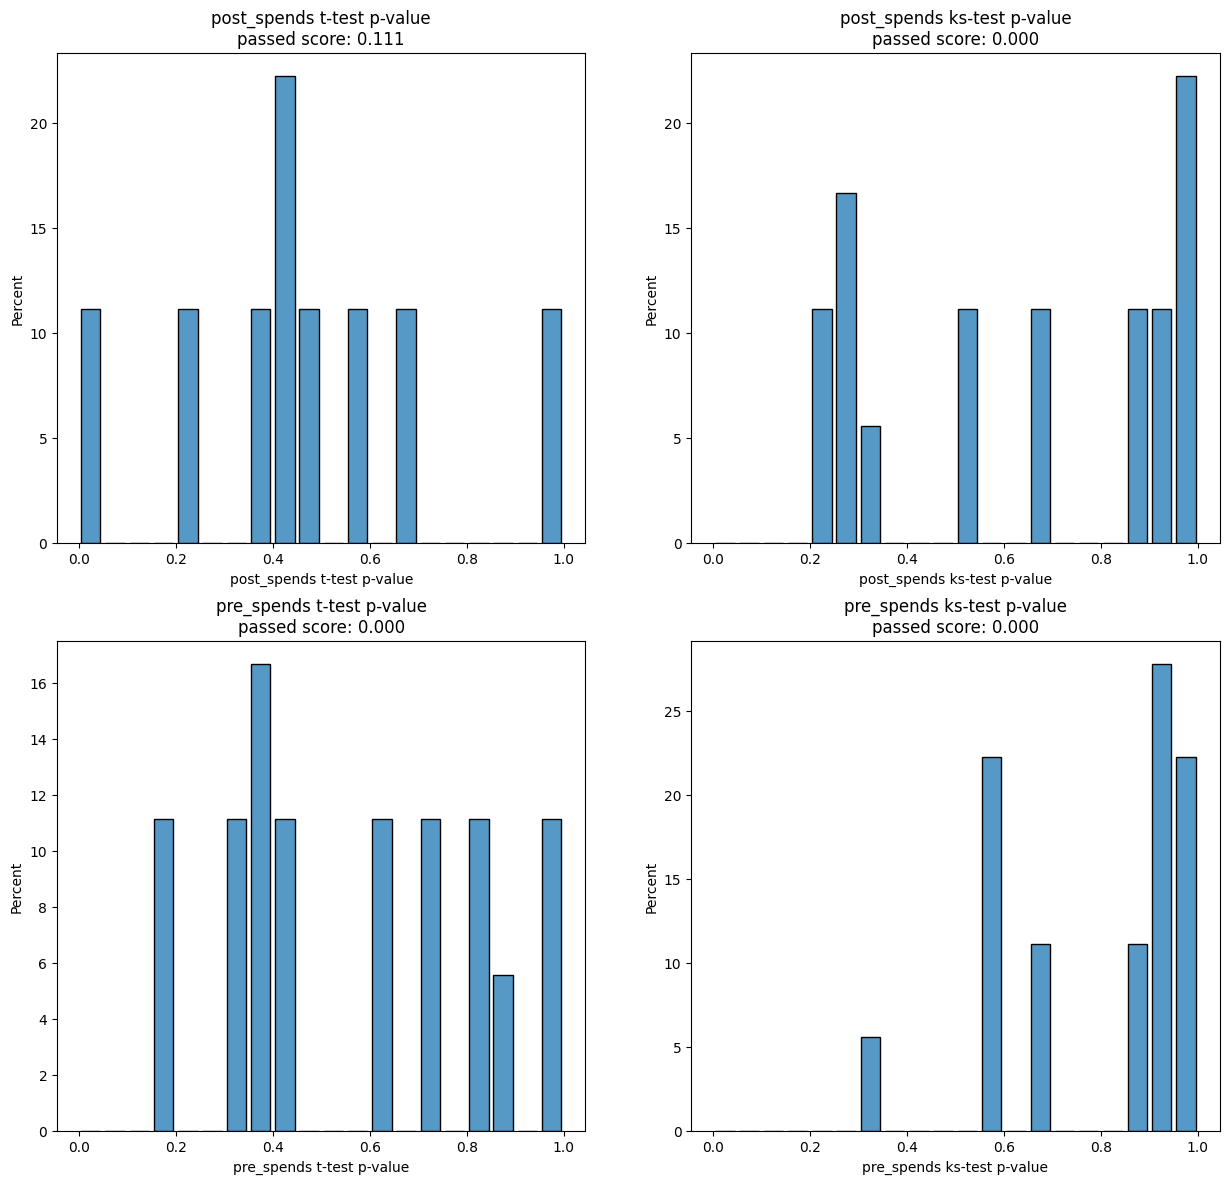

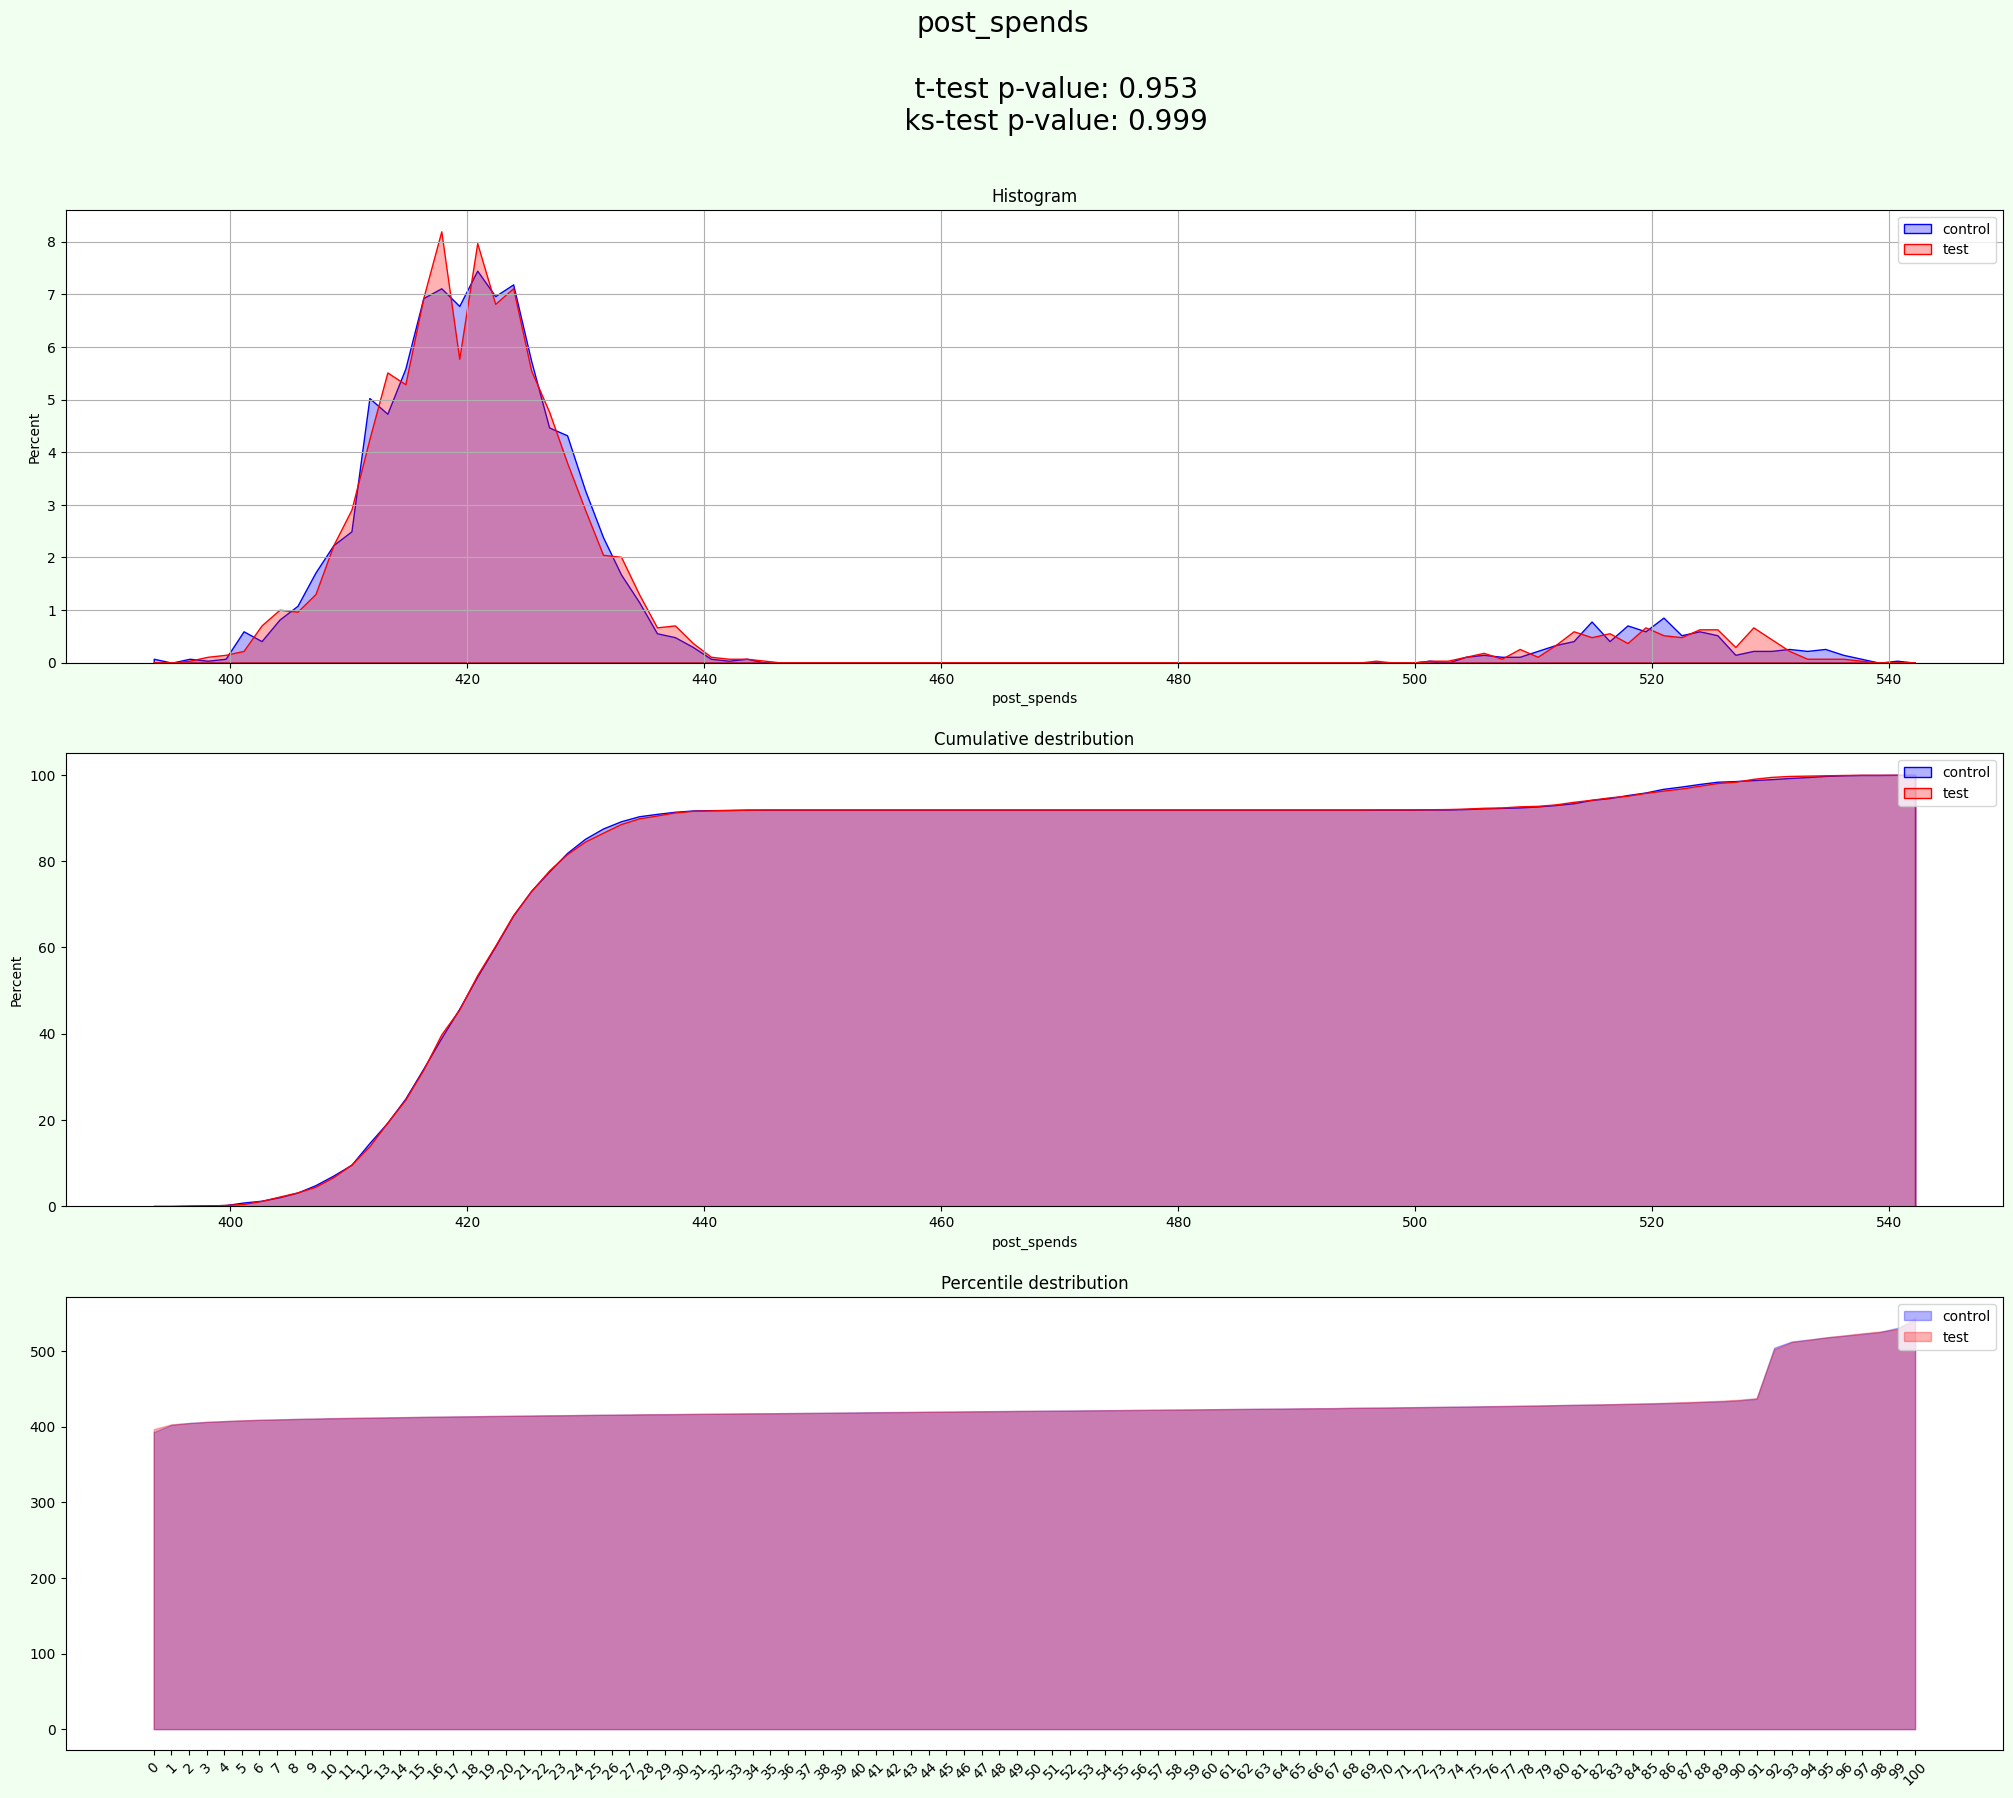

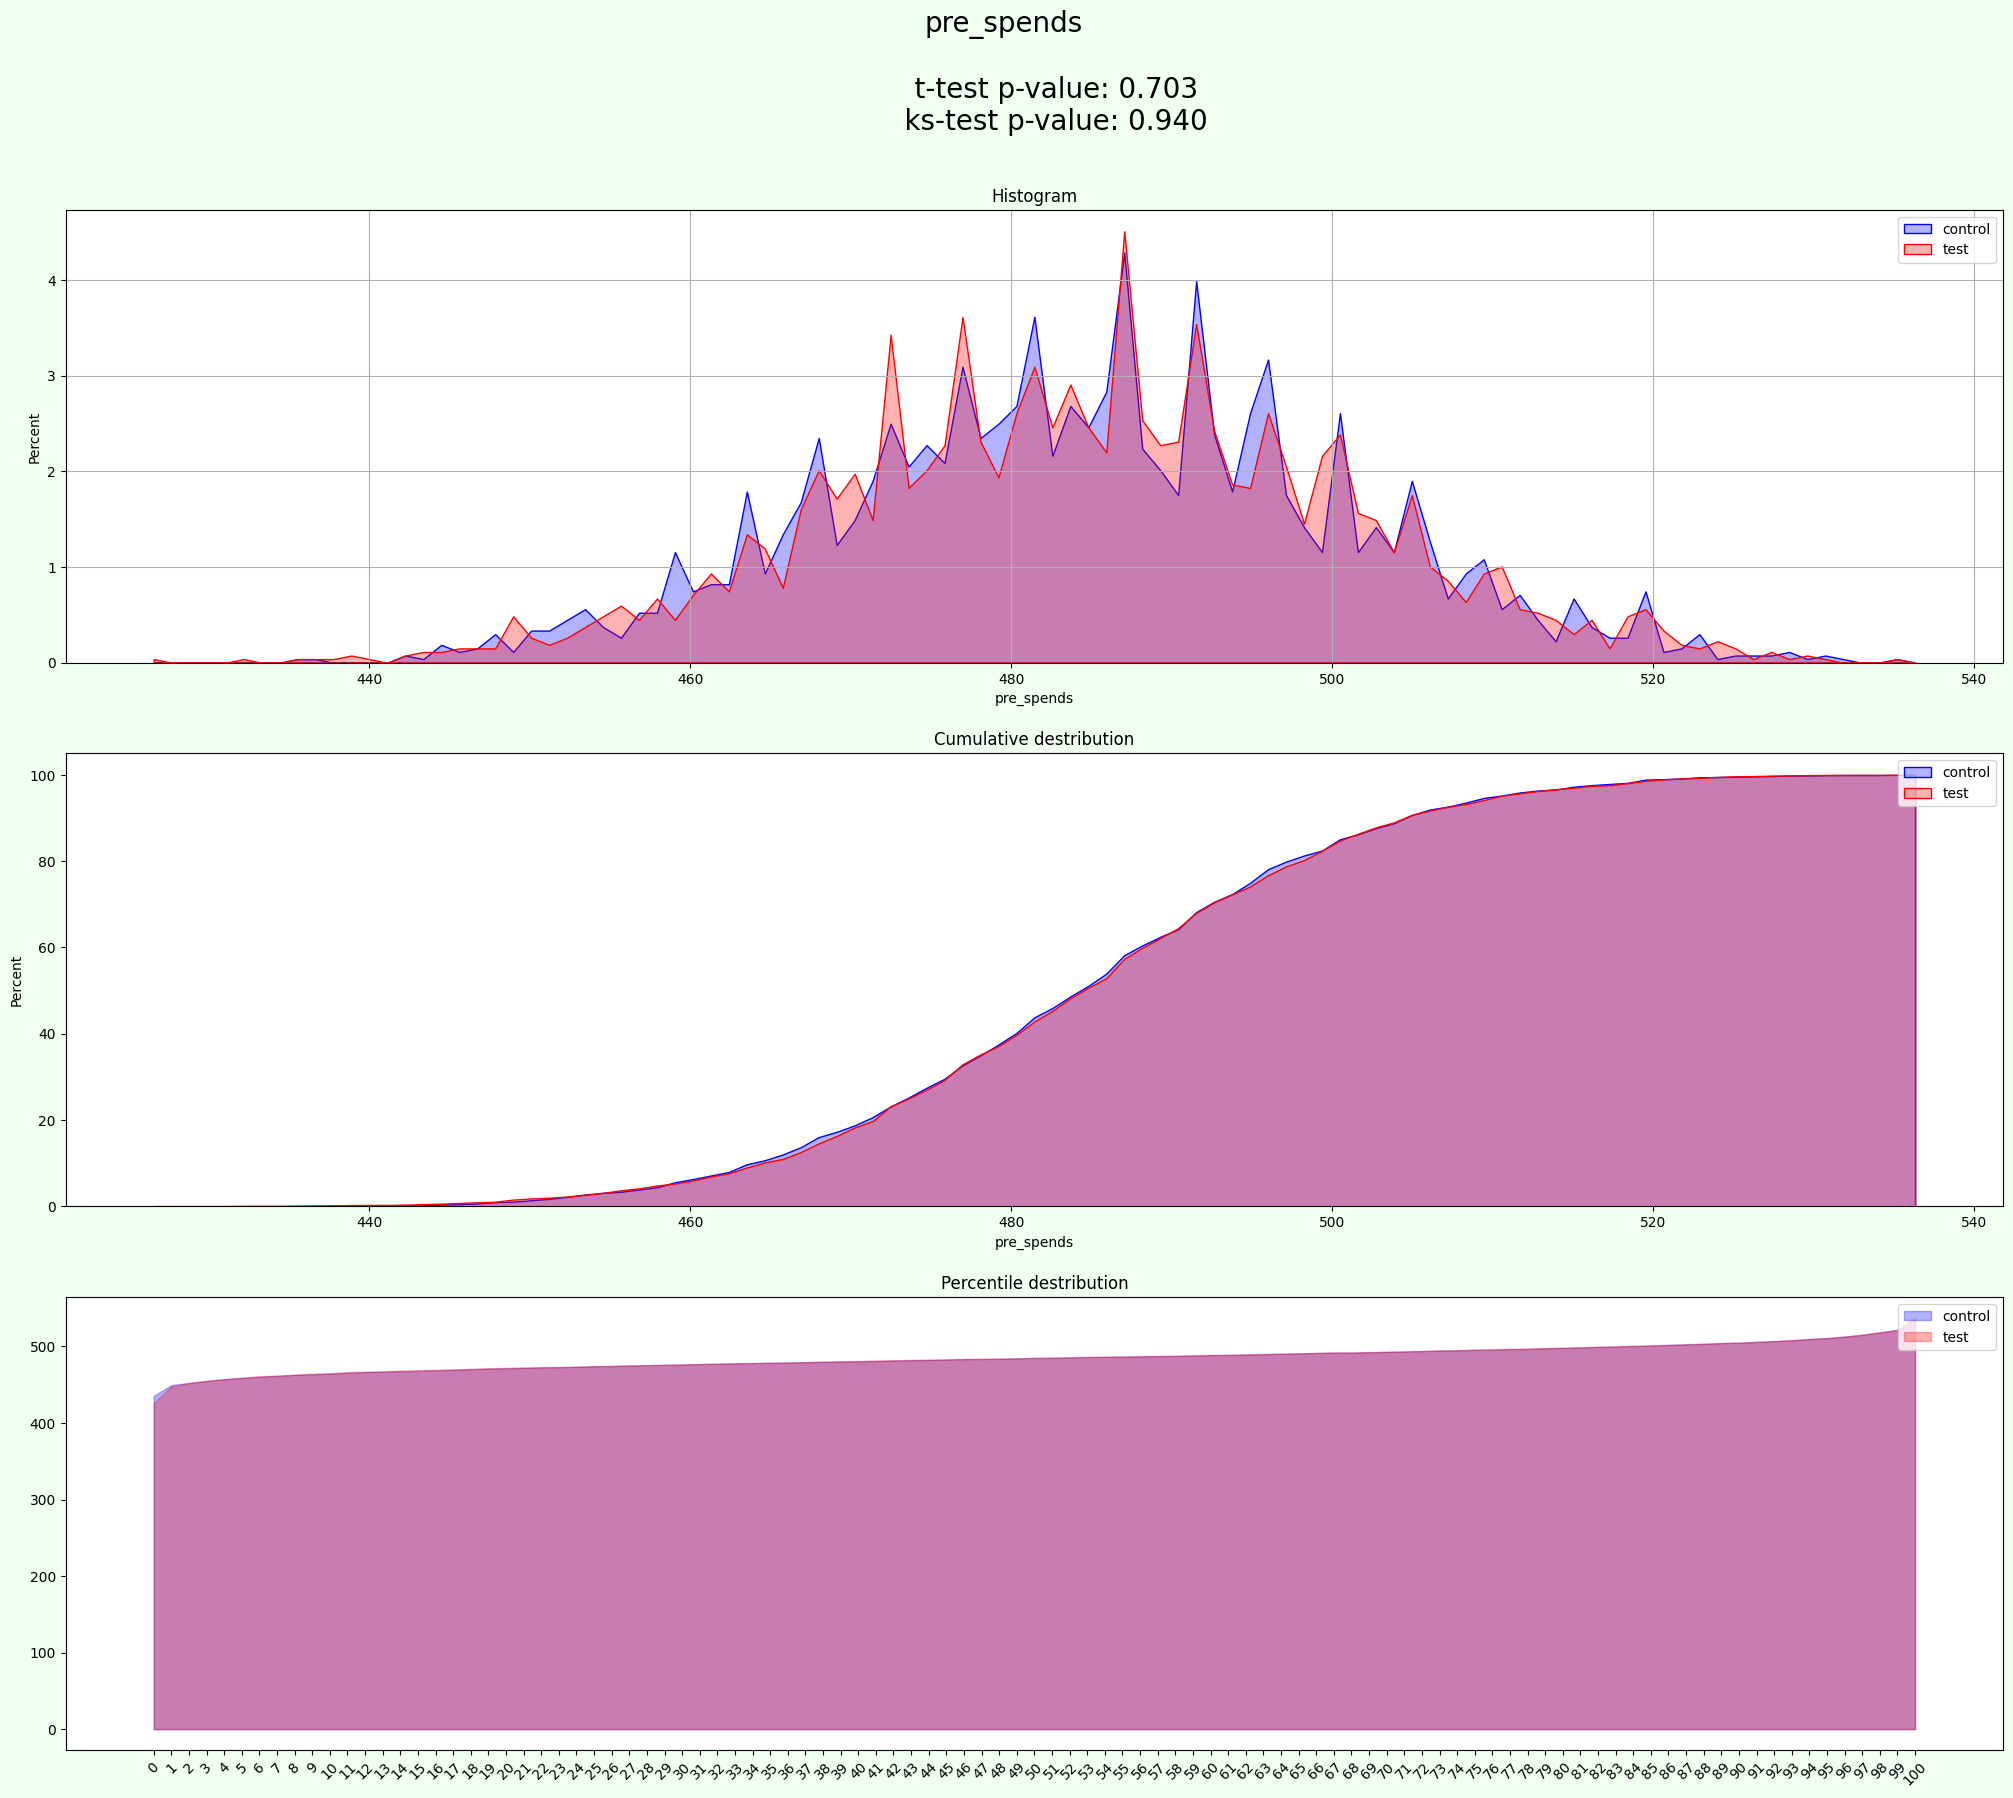

In [6]:
experiment_result, best_split = experiment.process(data, iterations=10)

`experiment_result` is a table of results of experiments, which includes 
- means of all targets in a and b samples, 
- p_values of Student t-test and test Kolmogorova-Smirnova, 
- and results of tests (did data on the random_state passes the uniform test)

In [8]:
experiment_result.sort_values("mean_tests_score")

,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t_test mean p-value,t_test passed %,ks-test mean p-value,ks-test passed %,mean_tests_score
14,7,429.06,427.26,-1.80,-0.42,0.02,0.29,True,False,485.12,...,False,50.00,50.00,2685,2685,NaN,NaN,0.31,0.00,0.27
11,5,427.89,428.43,0.54,0.13,0.49,0.26,False,False,484.71,...,False,50.00,50.00,2685,2685,NaN,NaN,0.41,0.00,0.41
10,5,427.89,428.43,0.54,0.13,0.49,0.26,False,False,484.71,...,False,50.00,50.00,2685,2685,NaN,NaN,0.41,0.00,0.41
15,8,429.02,427.30,-1.73,-0.40,0.03,0.30,True,False,484.89,...,False,50.00,50.00,2685,2685,NaN,NaN,0.61,0.00,0.56
13,6,428.51,427.82,-0.69,-0.16,0.37,0.22,False,False,484.97,...,False,50.00,50.00,2685,2685,NaN,NaN,0.61,0.00,0.61
12,6,428.51,427.82,-0.69,-0.16,0.37,0.22,False,False,484.97,...,False,50.00,50.00,2685,2685,NaN,NaN,0.61,0.00,0.61
0,0,428.48,427.85,-0.63,-0.15,0.42,0.86,False,False,485.22,...,False,50.00,50.00,2685,2685,NaN,NaN,0.77,0.00,0.61
1,0,428.48,427.85,-0.63,-0.15,0.42,0.86,False,False,485.22,...,False,50.00,50.00,2685,2685,NaN,NaN,0.77,0.00,0.61
2,1,428.65,427.67,-0.98,-0.23,0.21,0.54,False,False,485.04,...,False,50.00,50.00,2685,2685,NaN,NaN,0.73,0.00,0.62
3,1,428.65,427.67,-0.98,-0.23,0.21,0.54,False,False,485.04,...,False,50.00,50.00,2685,2685,NaN,NaN,0.73,0.00,0.62


`dict_of_datas` is a dictionary with random_states as keys and dataframes as values.<br>
Result of separation can be find in column 'group', it contains values 'test' and 'control'

In [9]:
best_split

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,12,0,0,472.00,423.78,43.00,M,E-commerce,test
2,14,0,0,497.00,421.78,26.00,M,Logistics,test
3,15,0,0,464.50,421.67,38.00,F,E-commerce,test
4,16,0,0,498.00,413.33,65.00,M,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce,control
5367,9994,0,0,486.00,423.78,27.00,F,Logistics,control
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce,control


#### - Single experiment
To get stable results lets fix `random_state`

In [9]:
random_state = 11

To perform single experiment you can use `sampling_metrics()`

In [10]:
experiment = AATest(info_cols=info_cols, target_fields=target)
metrics, dict_of_datas = experiment.sampling_metrics(data=data, random_state=random_state).values()

The results contains the same info as in multisampling, but on one experiment

In [11]:
metrics

{'random_state': 11,
 'post_spends a mean': 428.5347817090834,
 'post_spends b mean': 427.7893234016139,
 'post_spends ab delta': -0.7454583074695051,
 'post_spends ab delta %': -0.17425827777606262,
 'post_spends t-test p-value': 0.33561550504114157,
 'post_spends ks-test p-value': 0.6263469727648824,
 'post_spends t-test passed': False,
 'post_spends ks-test passed': False,
 'pre_spends a mean': 484.8584729981378,
 'pre_spends b mean': 484.9912476722533,
 'pre_spends ab delta': 0.13277467411546695,
 'pre_spends ab delta %': 0.027376715508320437,
 'pre_spends t-test p-value': 0.7577698697749307,
 'pre_spends ks-test p-value': 0.762662388584242,
 'pre_spends t-test passed': False,
 'pre_spends ks-test passed': False,
 'control %': 50.0,
 'test %': 50.0,
 'control size': 2685,
 'test size': 2685,
 't-test mean p-value': 0.5466926874080361,
 't-test passed %': 0.0,
 'ks-test mean p-value': 0.6945046806745622,
 'ks-test passed %': 0.0,
 'mean_tests_score': 0.6452340162523869}

In [12]:
dict_of_datas[random_state]

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,10,0,0,522.50,416.22,64.00,M,E-commerce,test
2,12,0,0,472.00,423.78,43.00,M,E-commerce,test
3,13,0,0,508.50,424.22,36.00,F,E-commerce,test
4,15,0,0,464.50,421.67,38.00,F,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5366,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5367,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5368,9992,0,0,491.50,424.00,44.00,M,E-commerce,control


### 2.2 AA-test with grouping

To perform experiment that separates samples by groups `group_col` can be used

In [15]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'

In [16]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

100%|██████████| 19/19 [00:01<00:00, 16.00it/s]


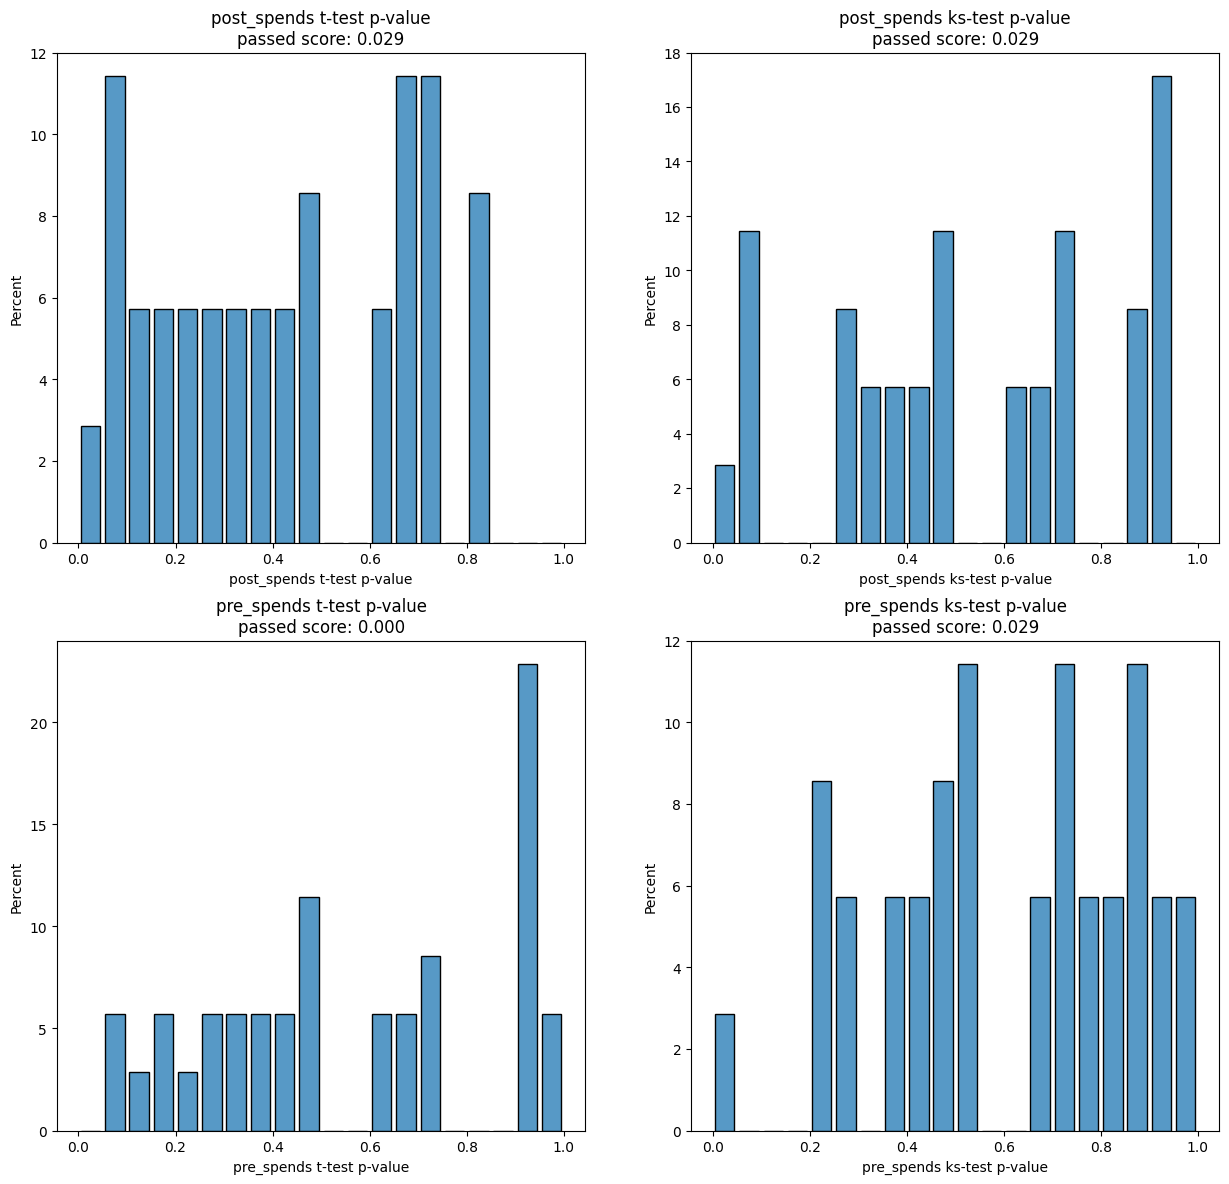

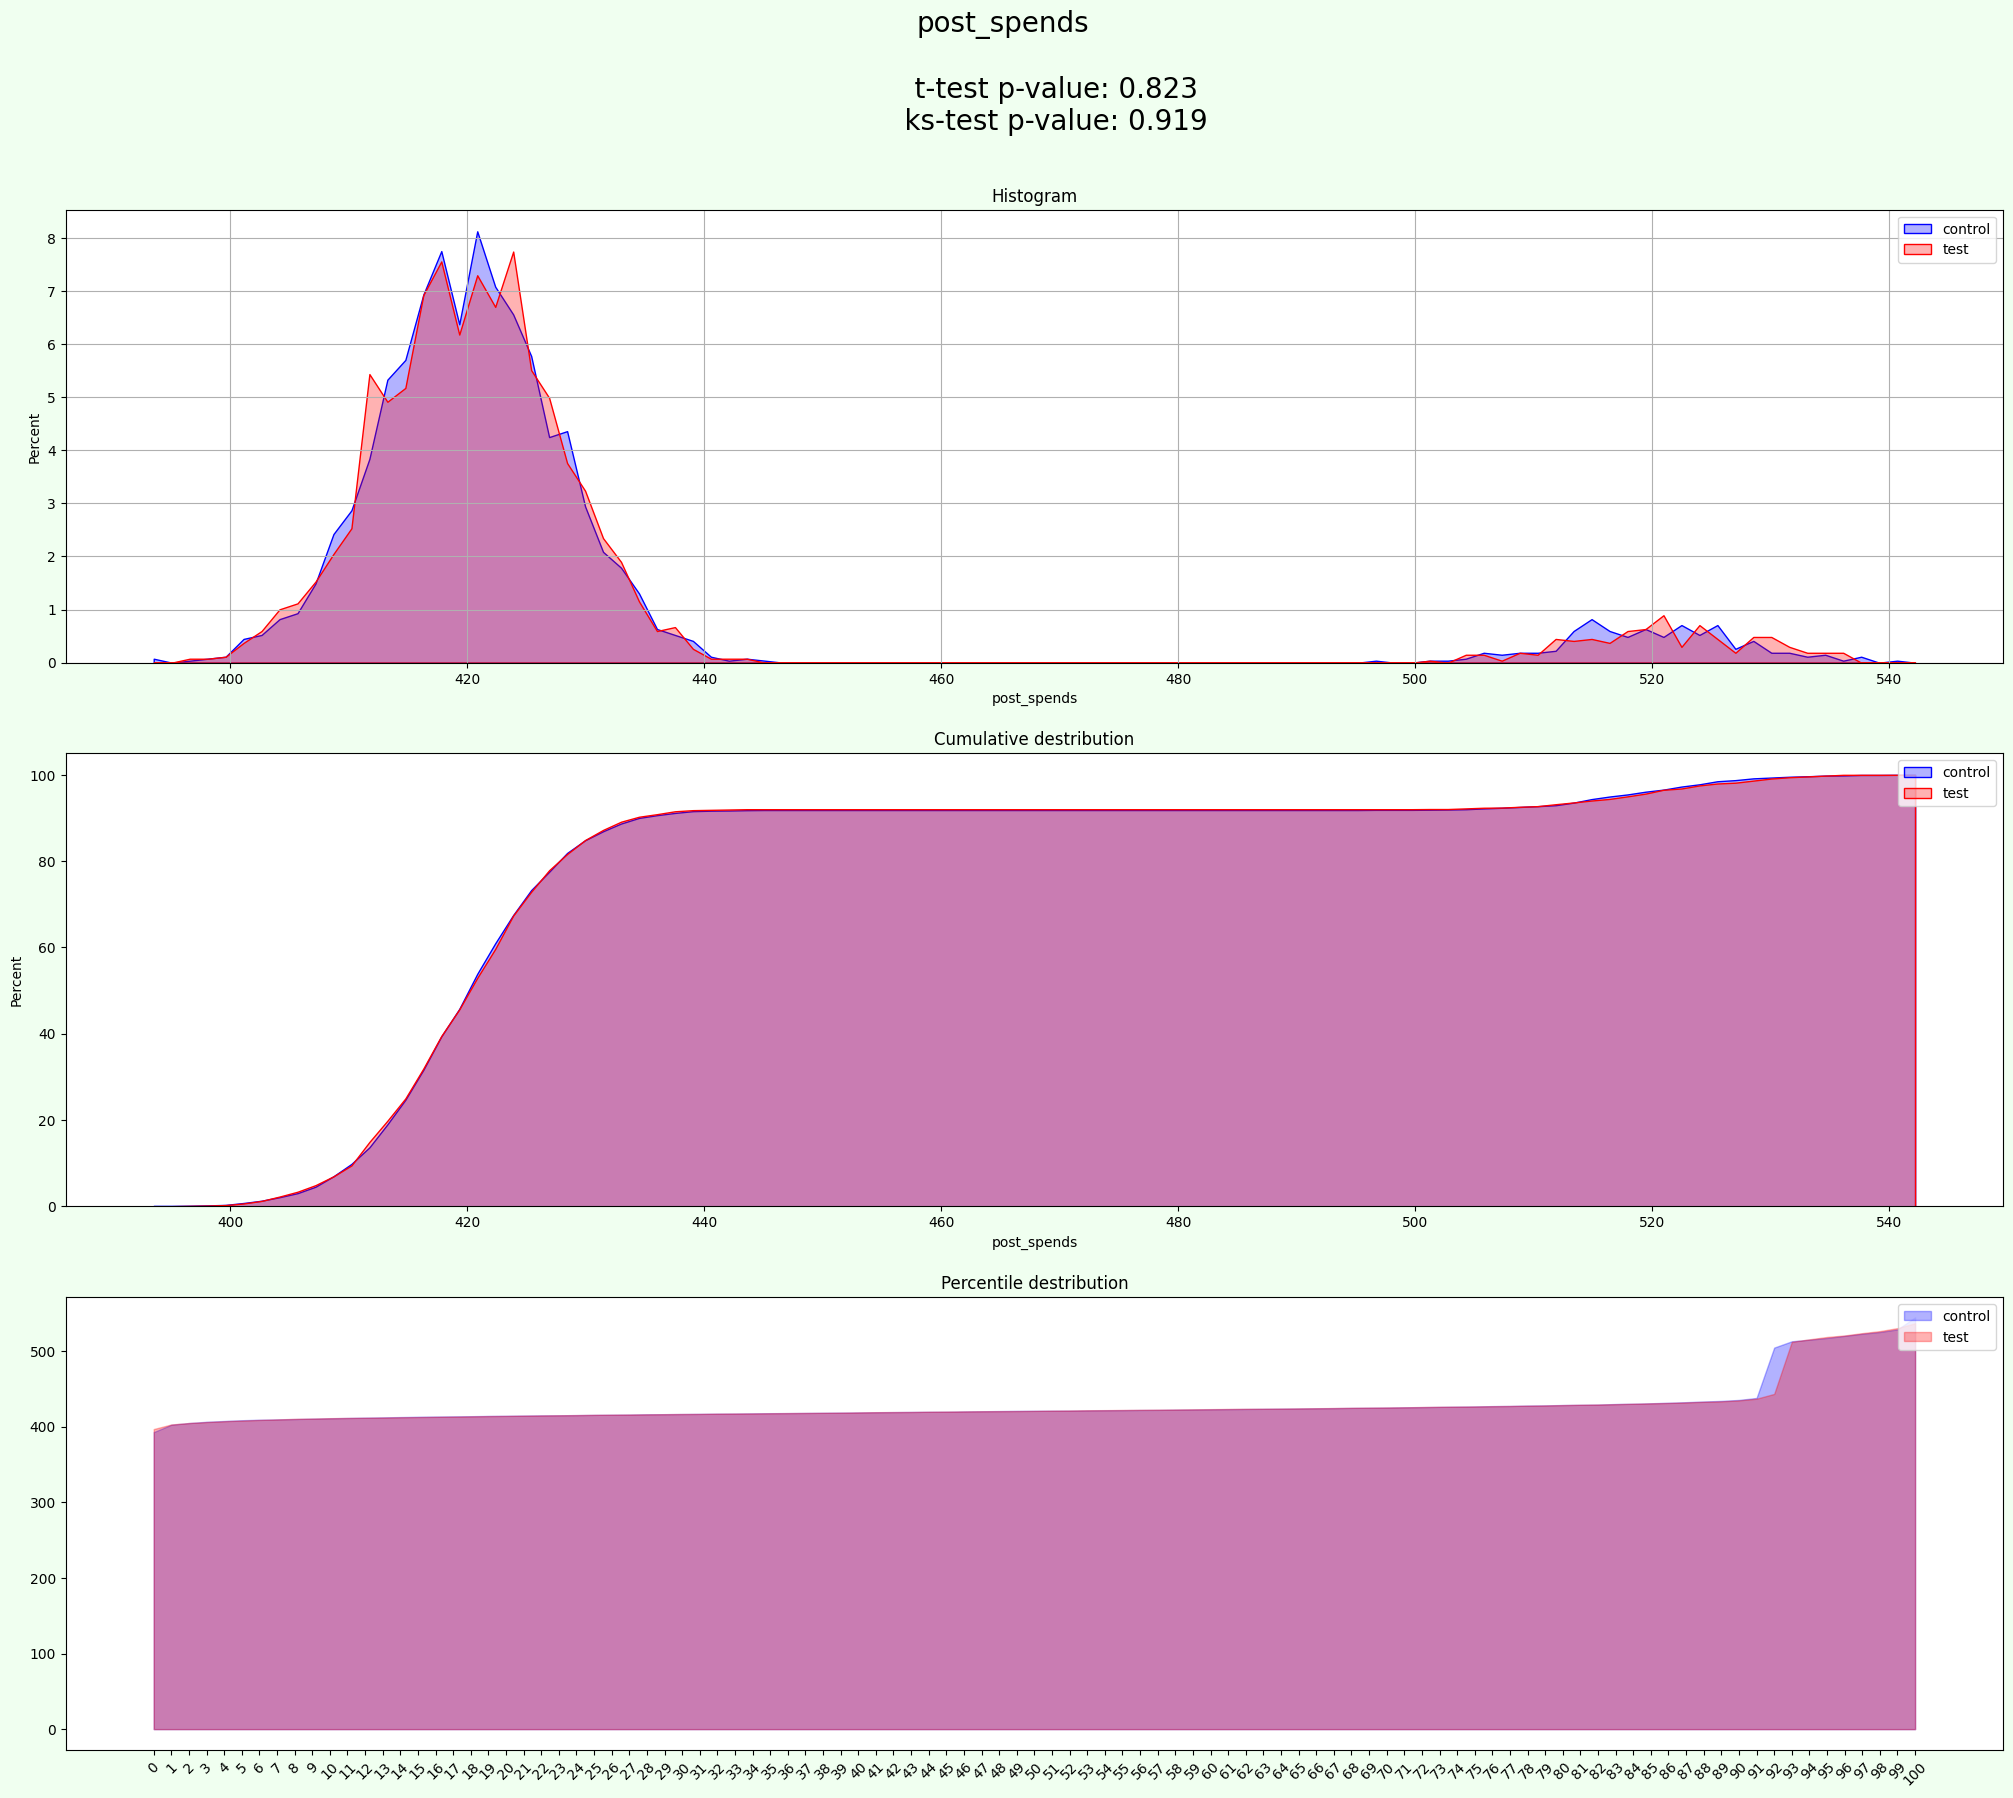

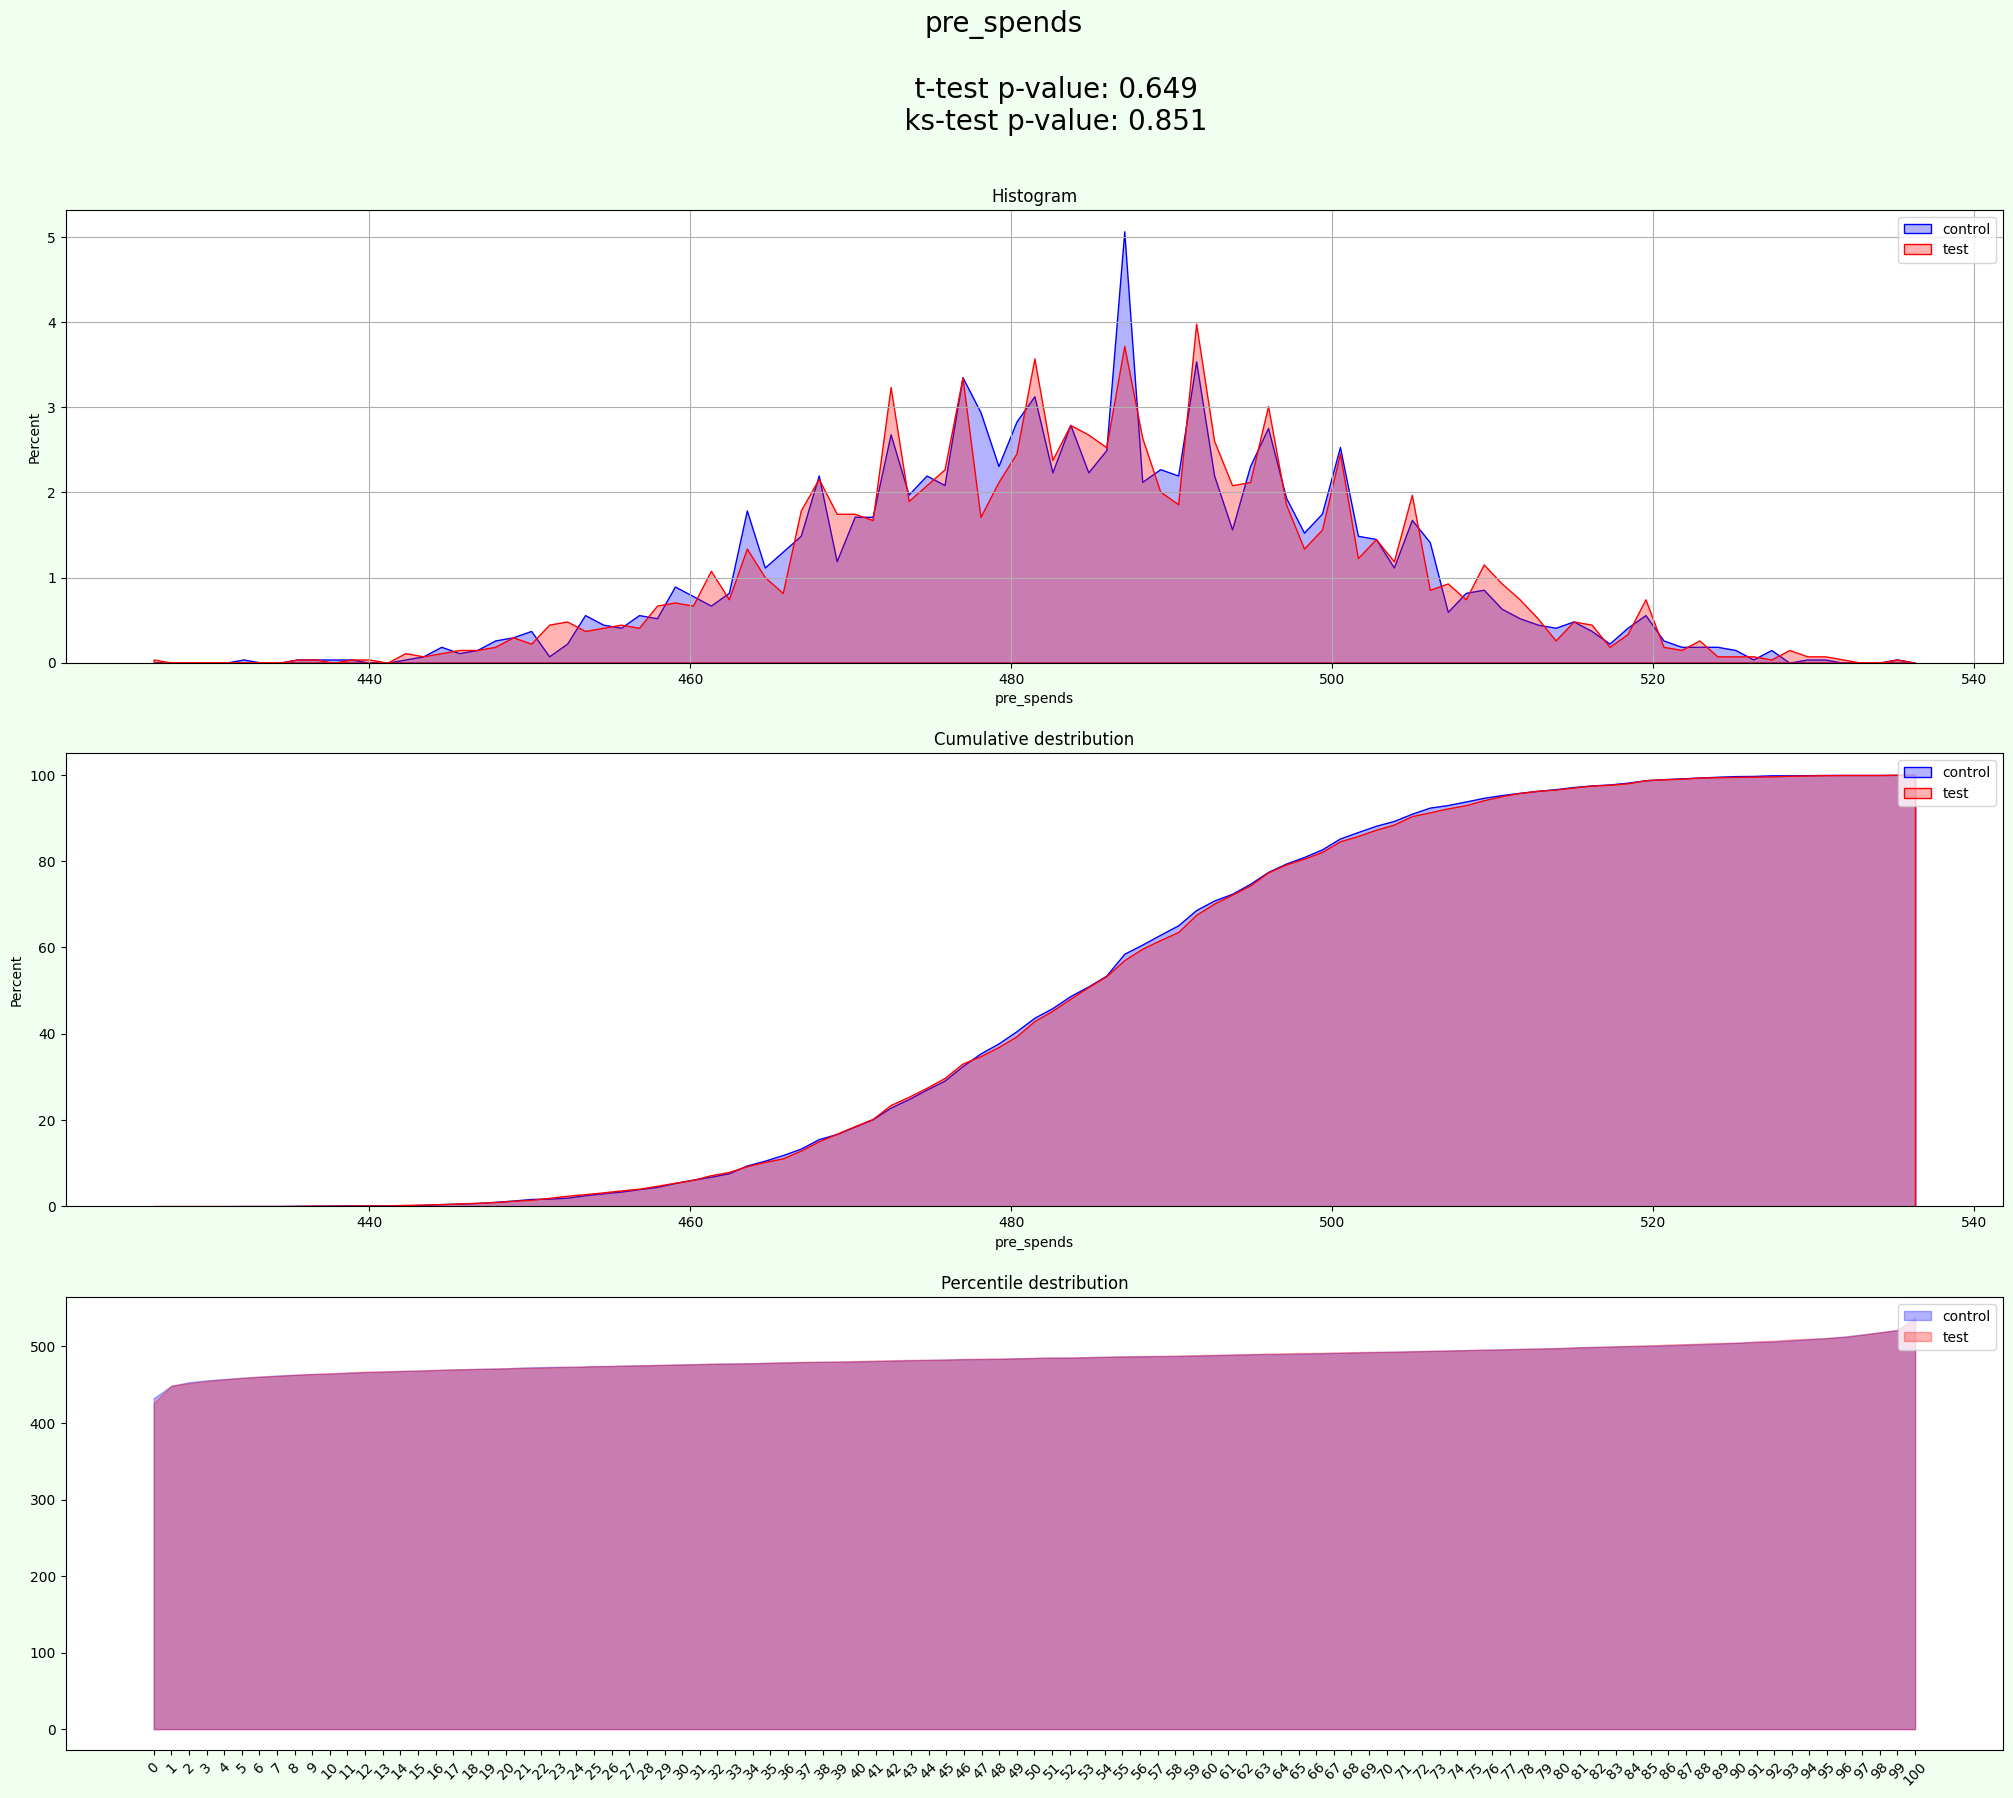

ValueError: operands could not be broadcast together with shapes (2684,) (2,) 

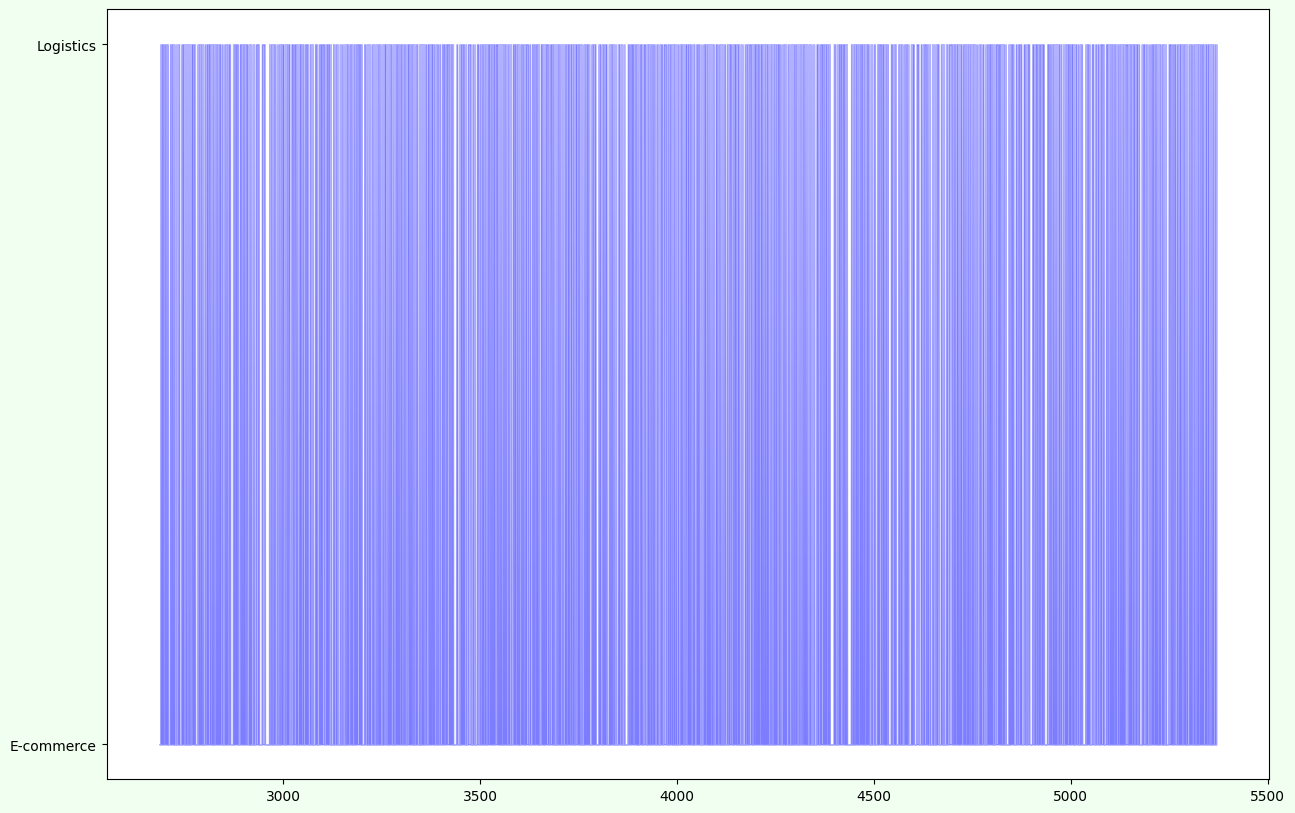

In [17]:
experiment_result, best_split = experiment.process(data=data, iterations=19)

The result is in the same format as without groups

In this regime groups equally divided on each sample (test and control):

In [18]:
best_split.groupby(['industry', 'group'])[['user_id']].count()

user_id
industry   group           
E-commerce control     1340
           test        1363
Logistics  control     1345
           test        1322

## AA with optimaize group

In [19]:
experiment.columns_labeling(data)

{'target_field': ['treat', 'pre_spends', 'post_spends', 'age'],
 'group_col': ['gender', 'industry']}

Group optimization: 100%|██████████| 3/3 [03:50<00:00, 76.84s/it]


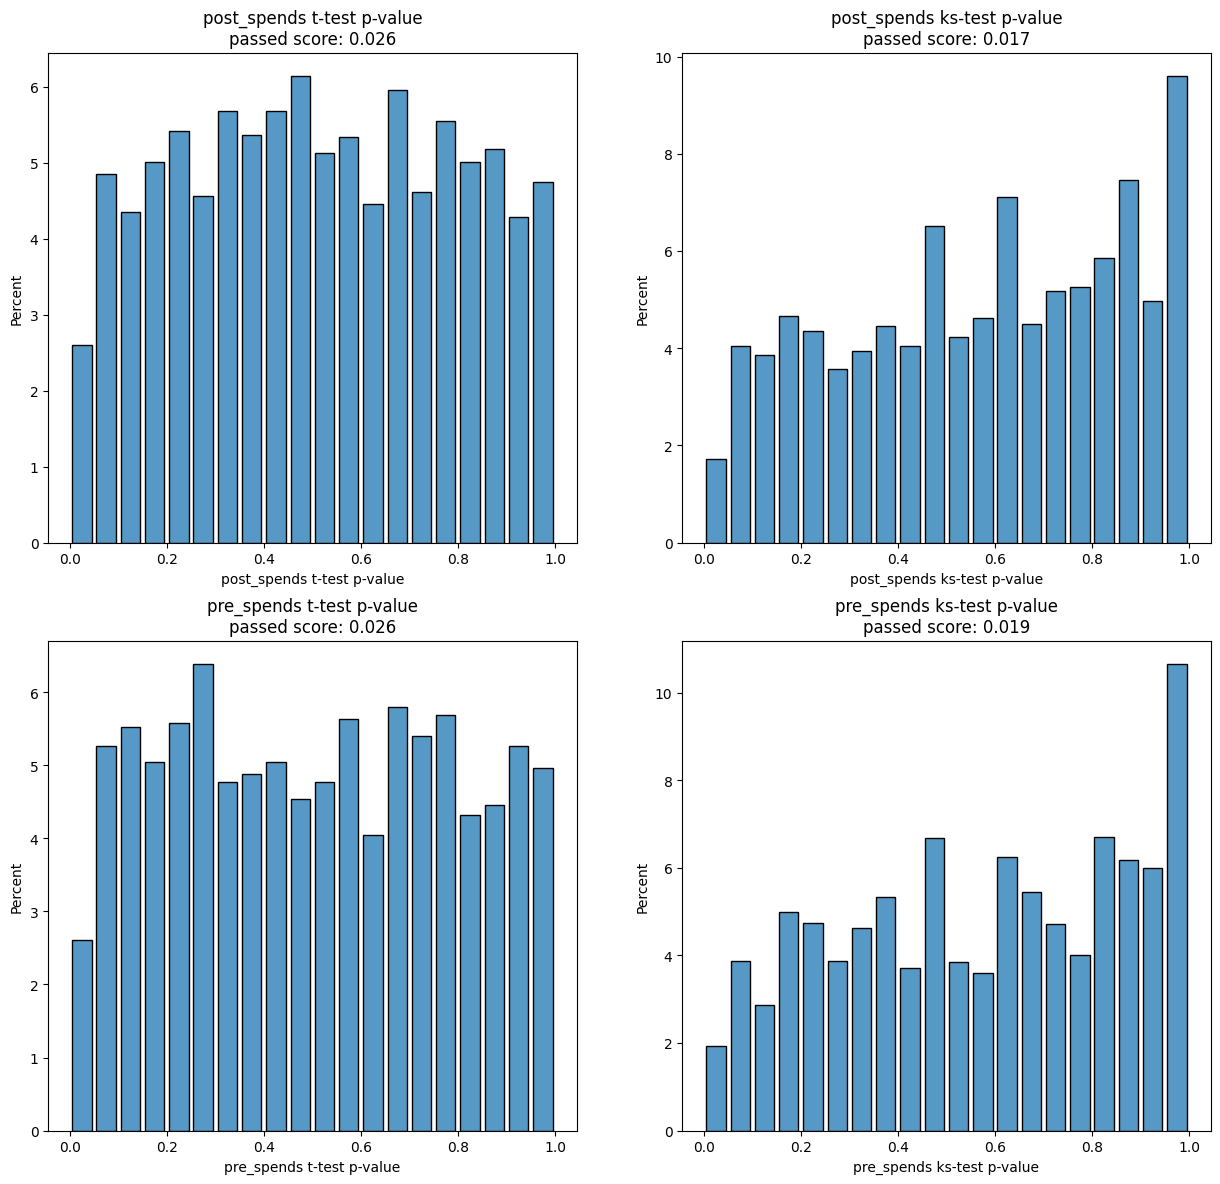

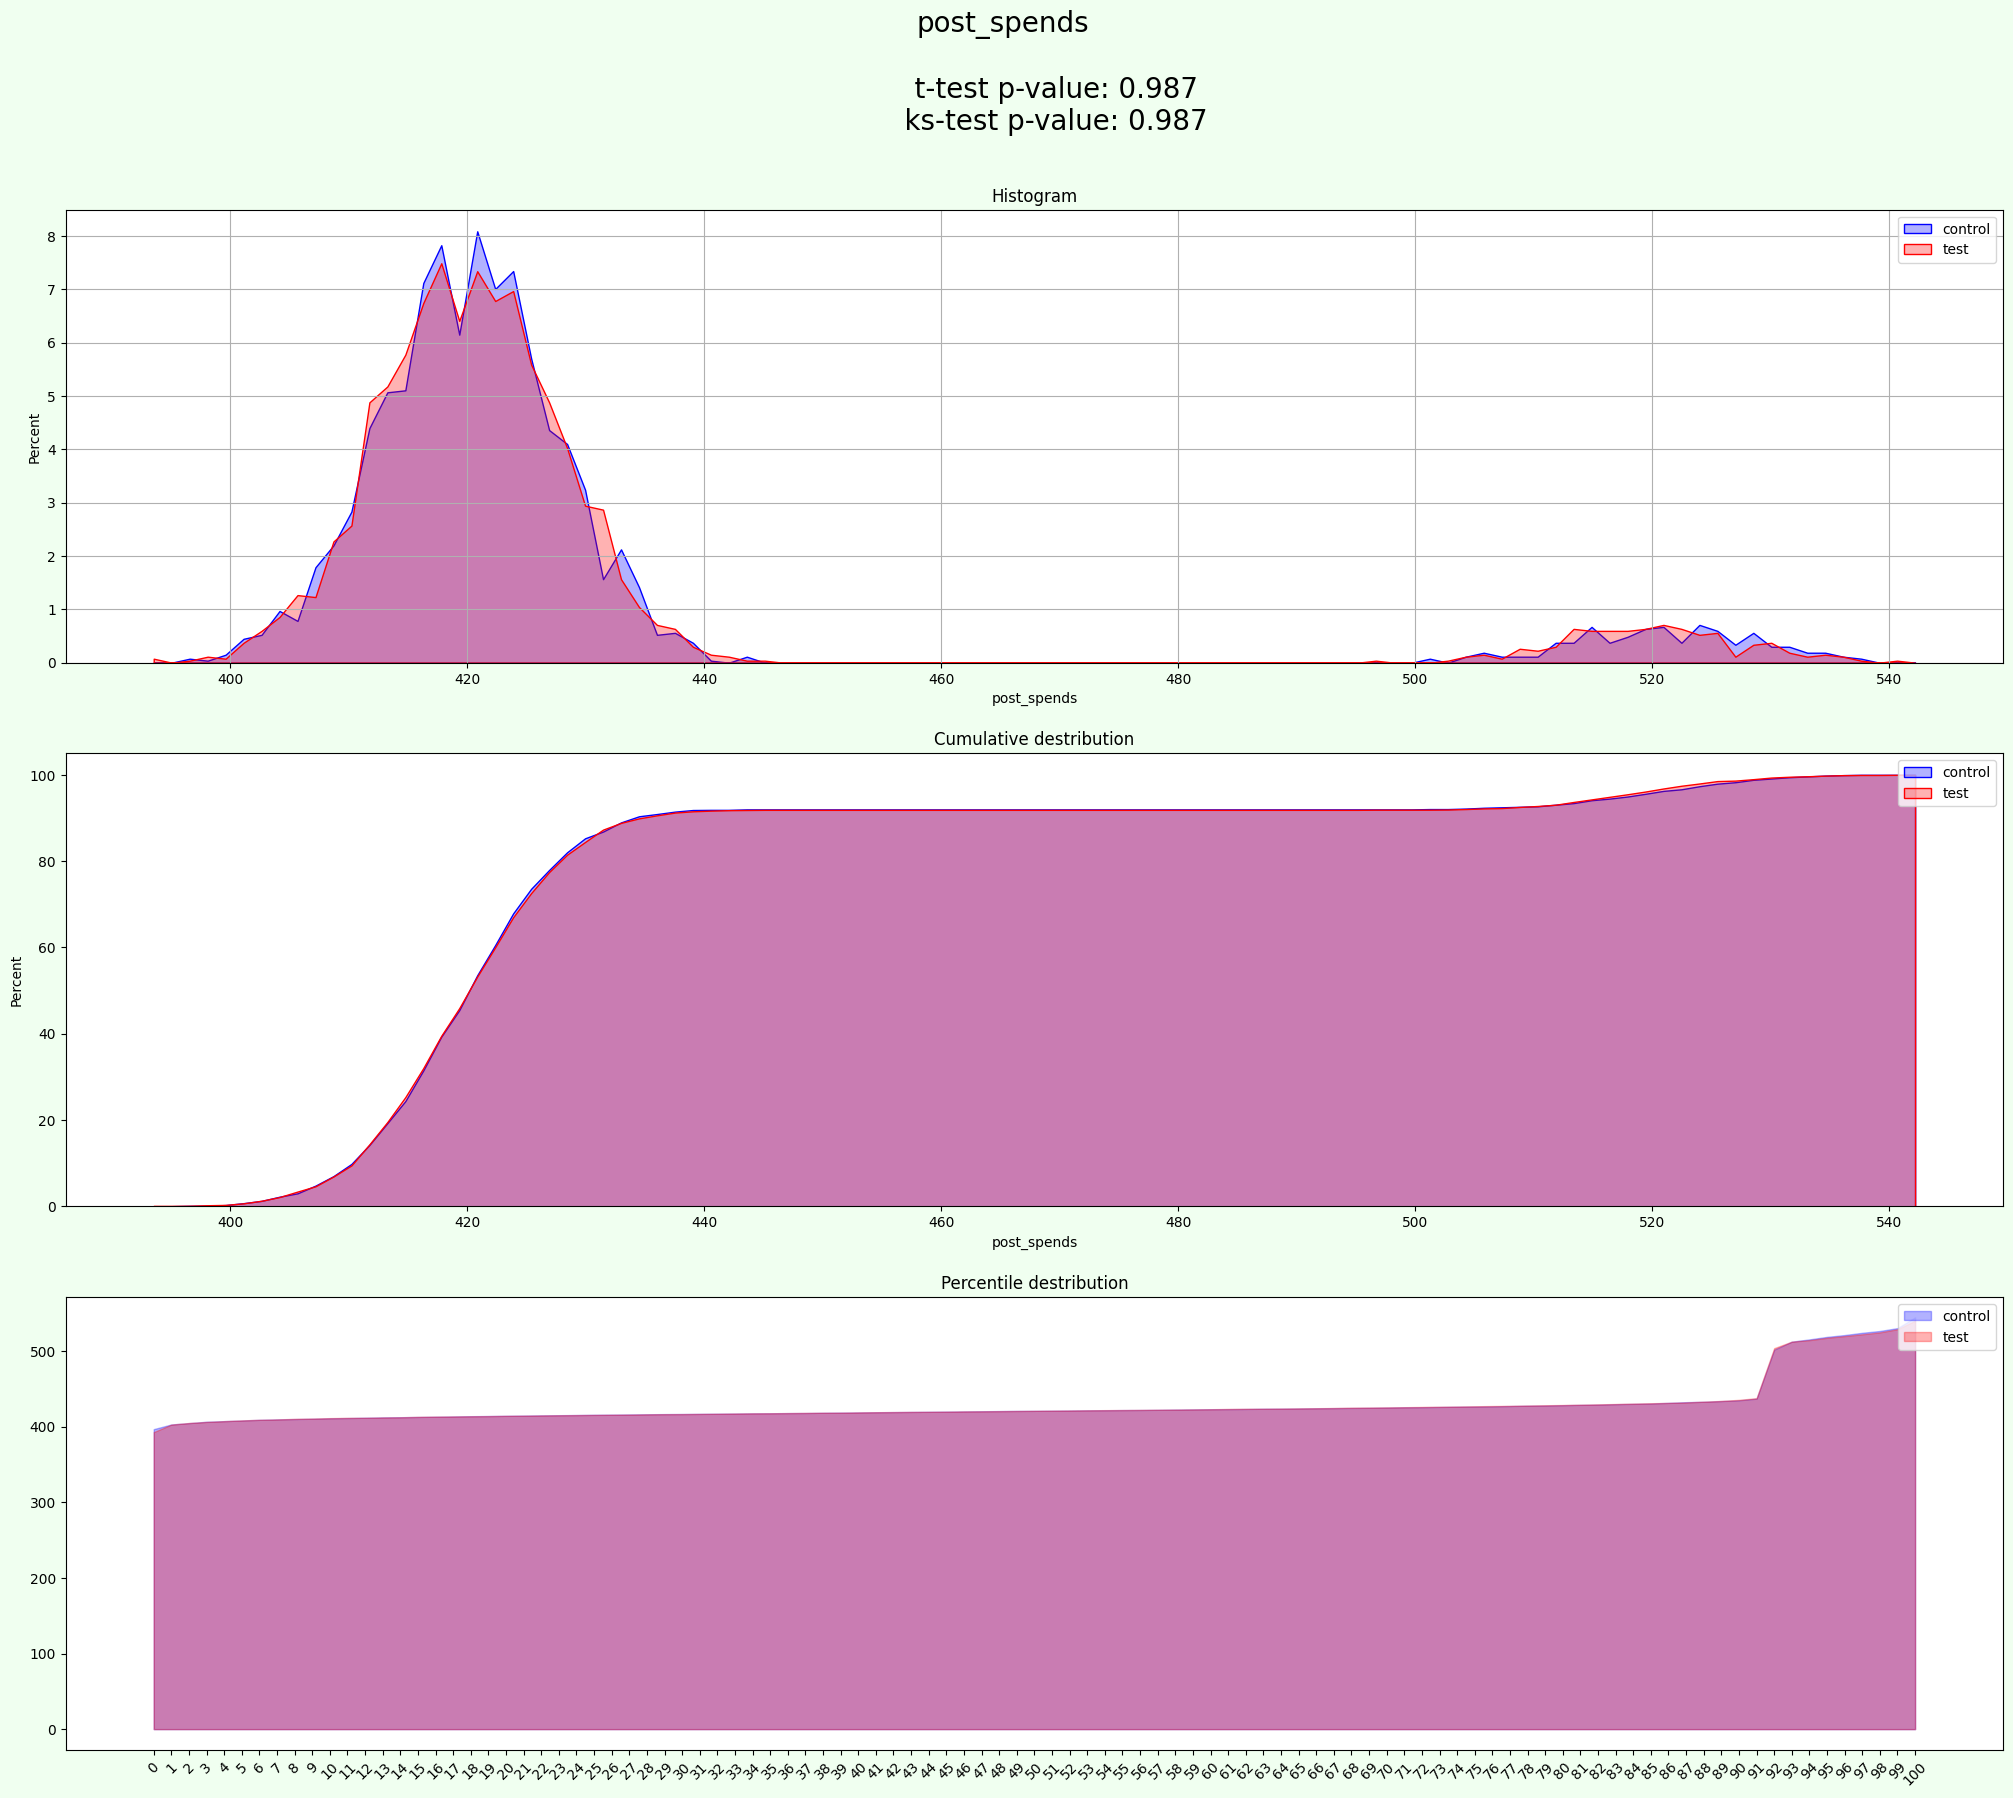

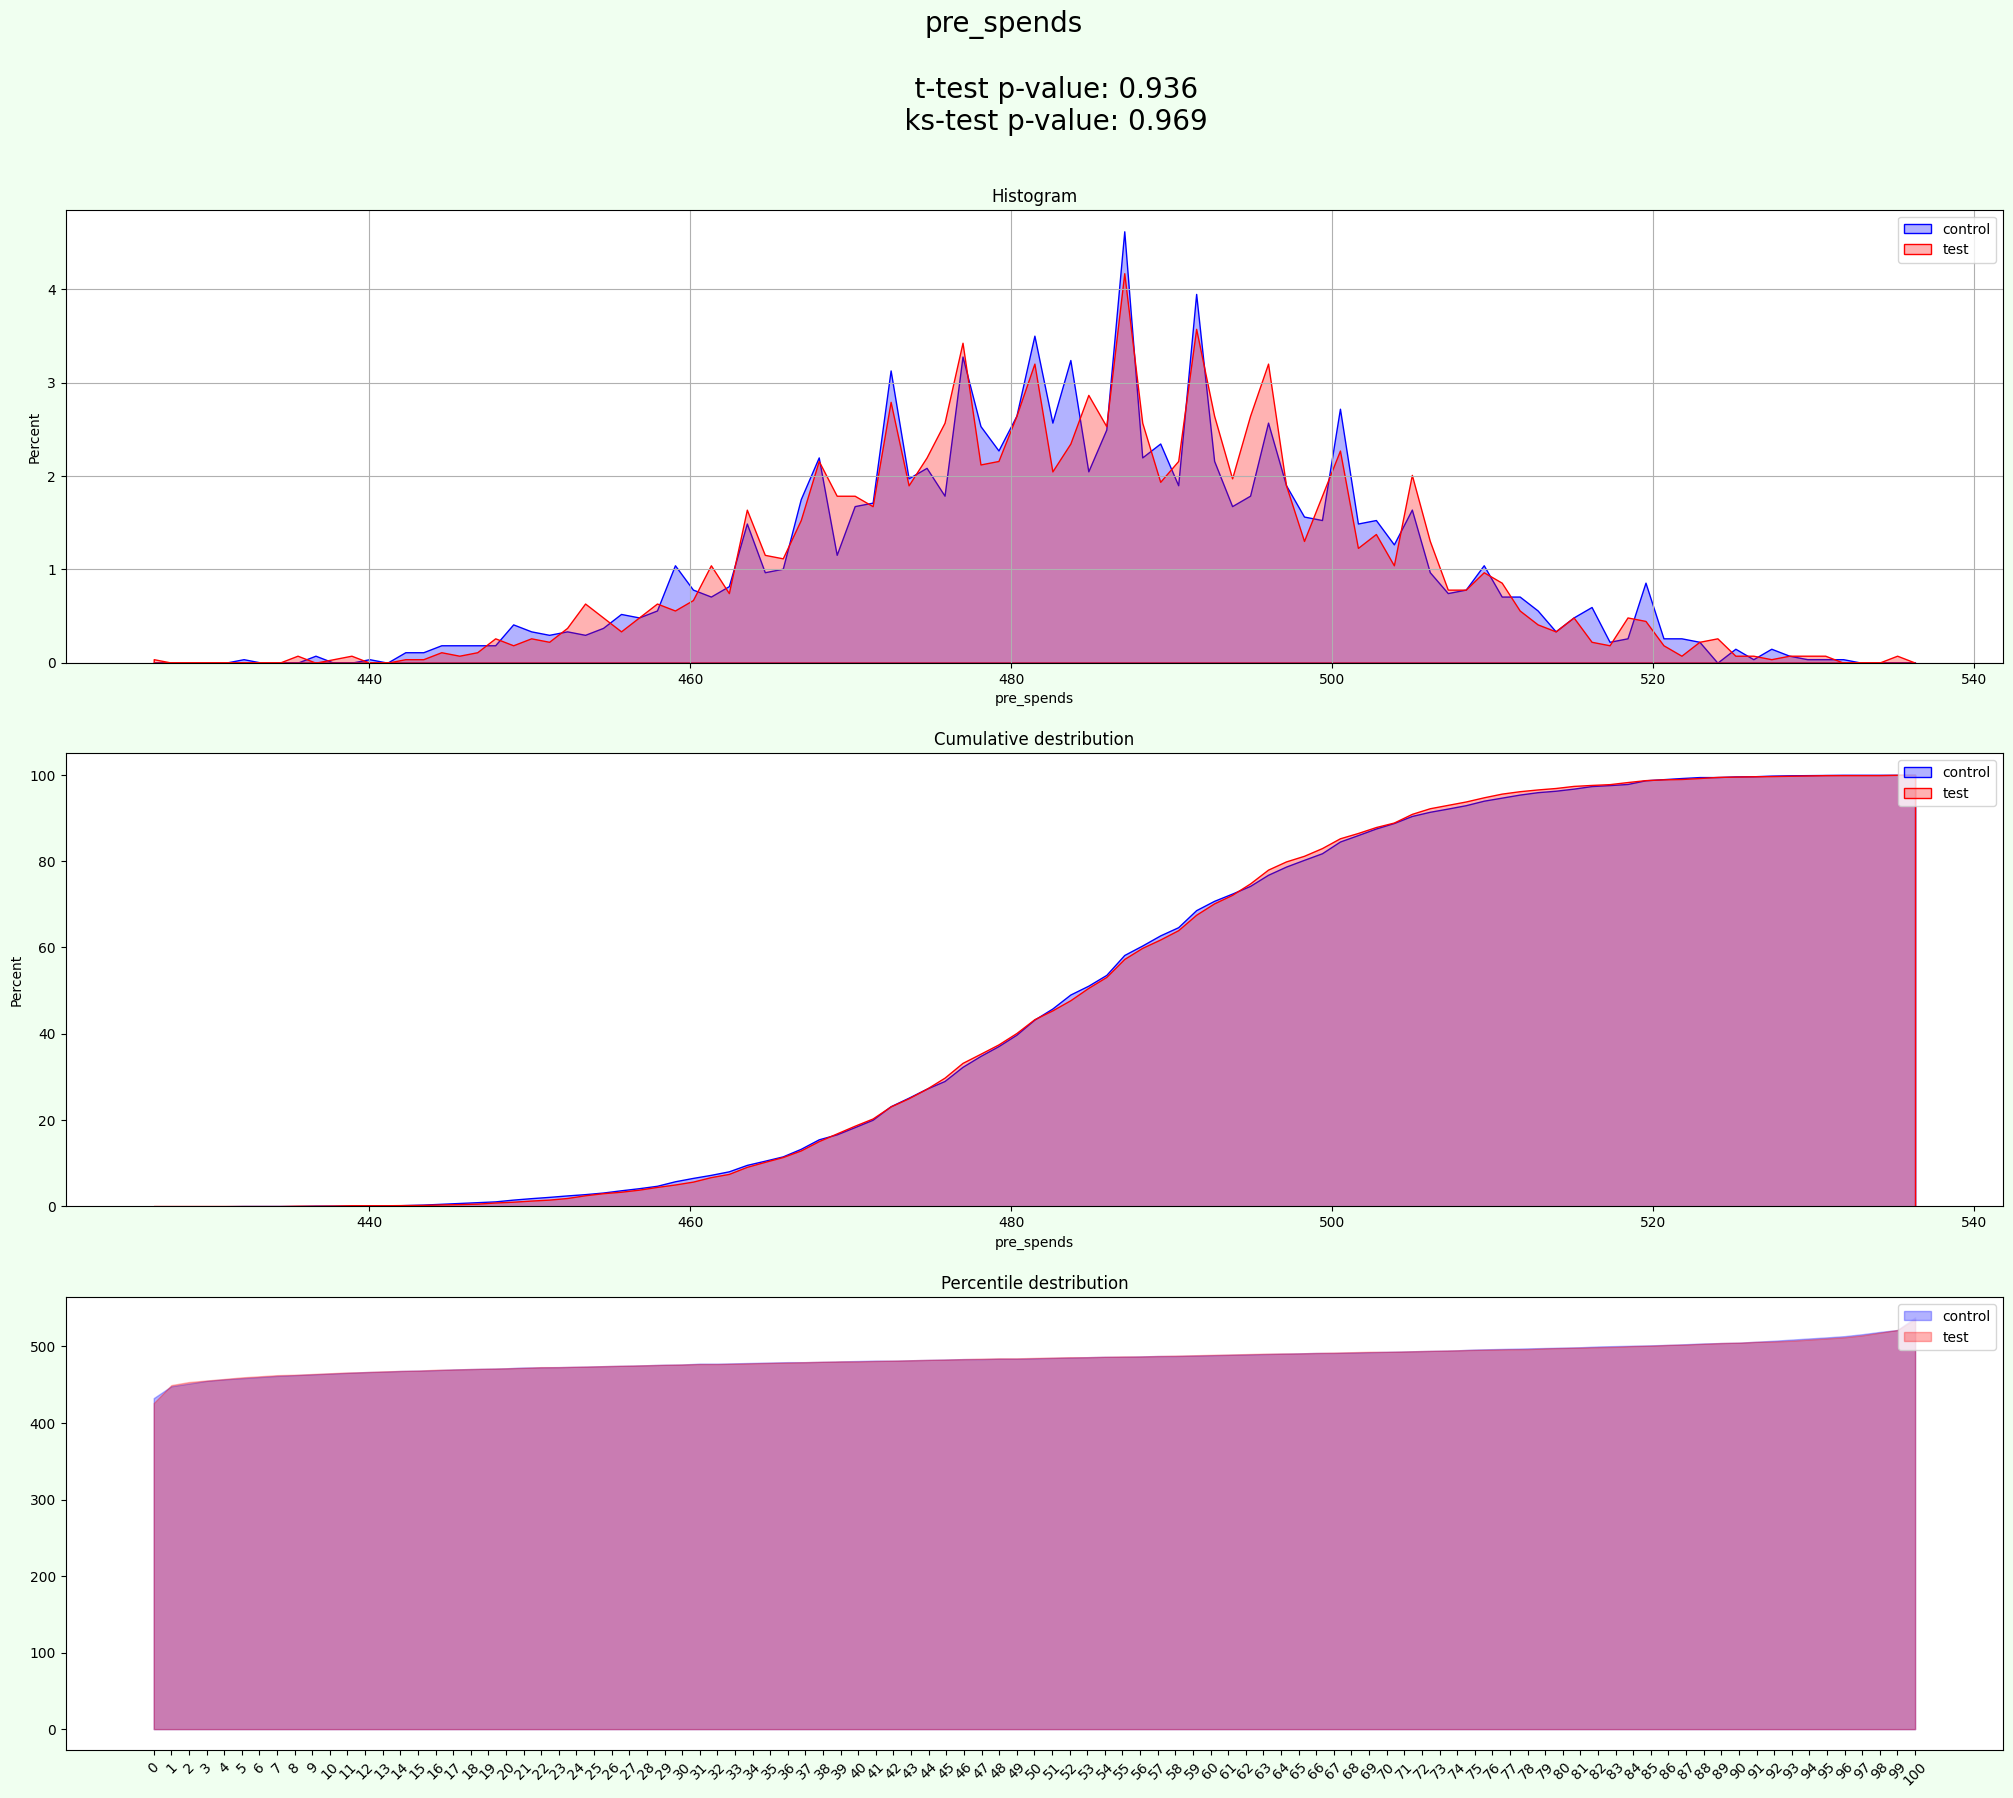

ValueError: operands could not be broadcast together with shapes (2685,) (2,) 

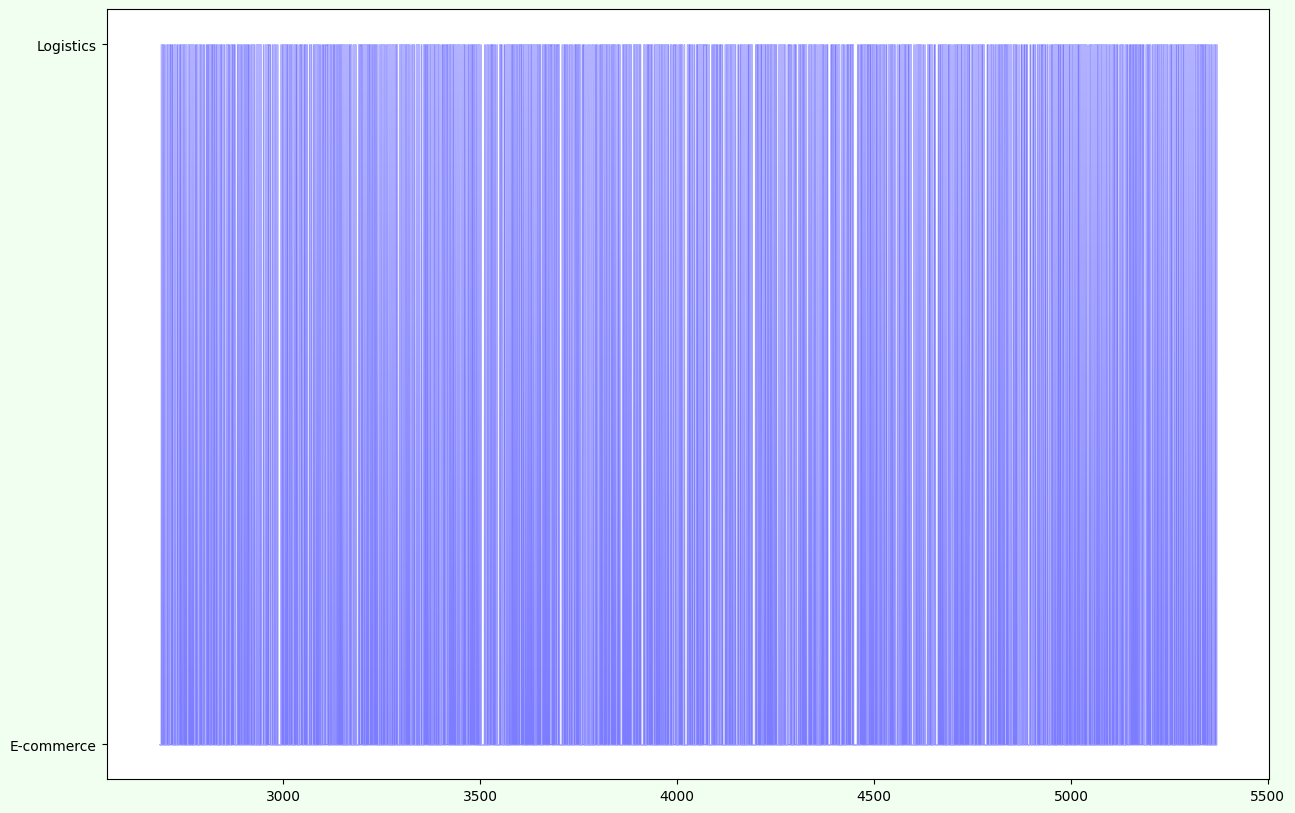

In [20]:
experiment_result, best_split = experiment.process(data=data, optimize_groups=True)

In [ ]:
experiment.group_cols

In [21]:
data.to_csv('test_data_with_error.csv')